http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

In [6]:
%load_ext blackcellmagic


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

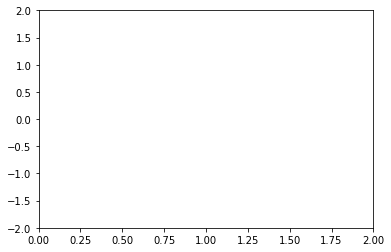

In [2]:
fig, ax = plt.subplots()

ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [3]:
def init():
    """plot the background of each frame"""
    line.set_data([], [])
    return (line,)

In [4]:
def animate():
    """called for each new frame"""
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.py * (x - 0.01 * i))
    line.set_data(x, y)
    return (line, )

Compile the animation.
Setting `blit=True` only redraws the parts that have changed

In [8]:
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=100, 
    interval=20, blit=True
)

# Display the animation

Now we can display this anim object using IPython's HTML display method. For comparison, we first encode the animation and render it as an HTML5 video using the to_html5_video method, as covered in my previous post:


In [9]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [10]:
HTML(anim.to_jshtml())

TypeError: animate() takes 0 positional arguments but 1 was given

In [12]:
# Initialize the Animation object again
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [13]:
anim._repr_html_() is None

True

In [14]:
anim

In [15]:
rc('animation', html='jshtml')

In [16]:
anim

TypeError: animate() takes 0 positional arguments but 1 was given